In [1]:
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import os
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datafinal/datafinal.csv


In [4]:
filename

'datafinal.csv'

In [5]:
df=pd.read_csv('/kaggle/input/datafinal/datafinal.csv')

In [6]:
df

,Unnamed: 0,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,0,2017-09-20 16:51:19.914,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,1,2017-09-20 16:51:19.969,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,2,2017-09-20 16:51:20.017,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,3,2017-09-20 16:51:20.066,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,4,2017-09-20 16:51:20.120,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,981,2017-09-22 14:29:28.788,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,982,2017-09-22 14:29:28.833,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,983,2017-09-22 14:29:28.940,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,984,2017-09-22 14:29:28.981,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42415 non-null  int64 
 1   Time        42415 non-null  object
 2   UNIX_T      42415 non-null  int64 
 3   RSSI1       42415 non-null  int64 
 4   RSSI2       42415 non-null  int64 
 5   RSSI3       42415 non-null  int64 
 6   Lux         42415 non-null  int64 
 7   Acc_x       42415 non-null  int64 
 8   Acc_y       42415 non-null  int64 
 9   Acc_z       42415 non-null  int64 
 10  Temp        42415 non-null  int64 
 11  ID          42415 non-null  int64 
 12  Pos         42415 non-null  int64 
 13  Si          42415 non-null  int64 
 14  Co          42415 non-null  int64 
 15  Ro          42415 non-null  int64 
dtypes: int64(15), object(1)
memory usage: 5.2+ MB


In [8]:
df.head

<bound method NDFrame.head of        Unnamed: 0                     Time         UNIX_T  RSSI1  RSSI2  \
0               0  2017-09-20 16:51:19.914  1505919079914     63     67   
1               1  2017-09-20 16:51:19.969  1505919079969     57     70   
2               2  2017-09-20 16:51:20.017  1505919080017     52     62   
3               3  2017-09-20 16:51:20.066  1505919080066     61     58   
4               4  2017-09-20 16:51:20.120  1505919080120     57     67   
...           ...                      ...            ...    ...    ...   
42410         981  2017-09-22 14:29:28.788  1506083368788     58     65   
42411         982  2017-09-22 14:29:28.833  1506083368833     62     72   
42412         983  2017-09-22 14:29:28.940  1506083368940     53     57   
42413         984  2017-09-22 14:29:28.981  1506083368981     48     61   
42414         985  2017-09-22 14:29:29.061  1506083369061     56     62   

       RSSI3  Lux  Acc_x  Acc_y  Acc_z   Temp  ID  Pos  Si  Co  Ro  


In [9]:
drop_cols = ['Unnamed: 0']
df = df.drop(drop_cols, axis=1)

In [10]:
df

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,2017-09-20 16:51:19.914,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,2017-09-20 16:51:19.969,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,2017-09-20 16:51:20.017,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,2017-09-20 16:51:20.066,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,2017-09-20 16:51:20.120,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,2017-09-22 14:29:28.788,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,2017-09-22 14:29:28.833,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,2017-09-22 14:29:28.940,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,2017-09-22 14:29:28.981,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    42415 non-null  object
 1   UNIX_T  42415 non-null  int64 
 2   RSSI1   42415 non-null  int64 
 3   RSSI2   42415 non-null  int64 
 4   RSSI3   42415 non-null  int64 
 5   Lux     42415 non-null  int64 
 6   Acc_x   42415 non-null  int64 
 7   Acc_y   42415 non-null  int64 
 8   Acc_z   42415 non-null  int64 
 9   Temp    42415 non-null  int64 
 10  ID      42415 non-null  int64 
 11  Pos     42415 non-null  int64 
 12  Si      42415 non-null  int64 
 13  Co      42415 non-null  int64 
 14  Ro      42415 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 4.9+ MB


In [12]:
a= df.copy()

In [13]:
b=df.copy()

In [14]:
c= df.copy()

In [15]:
a

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,2017-09-20 16:51:19.914,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,2017-09-20 16:51:19.969,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,2017-09-20 16:51:20.017,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,2017-09-20 16:51:20.066,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,2017-09-20 16:51:20.120,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,2017-09-22 14:29:28.788,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,2017-09-22 14:29:28.833,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,2017-09-22 14:29:28.940,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,2017-09-22 14:29:28.981,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [16]:
df.shape

(42415, 15)

In [17]:
#missing values cheacking
df.apply(lambda x: sum(x.isnull()),axis=0)

Time      0
UNIX_T    0
RSSI1     0
RSSI2     0
RSSI3     0
Lux       0
Acc_x     0
Acc_y     0
Acc_z     0
Temp      0
ID        0
Pos       0
Si        0
Co        0
Ro        0
dtype: int64

In [34]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# columns to select for encoding
selected_col = ['Time']

le.fit(df[selected_col].values.flatten())

df[selected_col] = df[selected_col].apply(le.fit_transform)

In [130]:
#b used as dataframe for rfc
b=df.copy()

In [131]:
#c used as dataframe for knn
c=df.copy()

In [35]:
df

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


# **DATA PLOTTING**

In [36]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

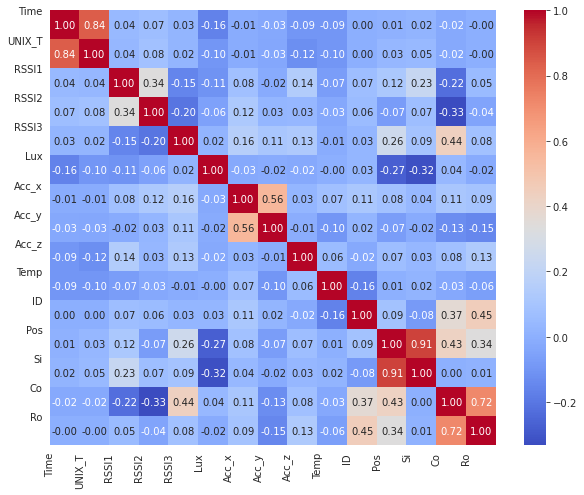

In [37]:
corr = df.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

<AxesSubplot:>

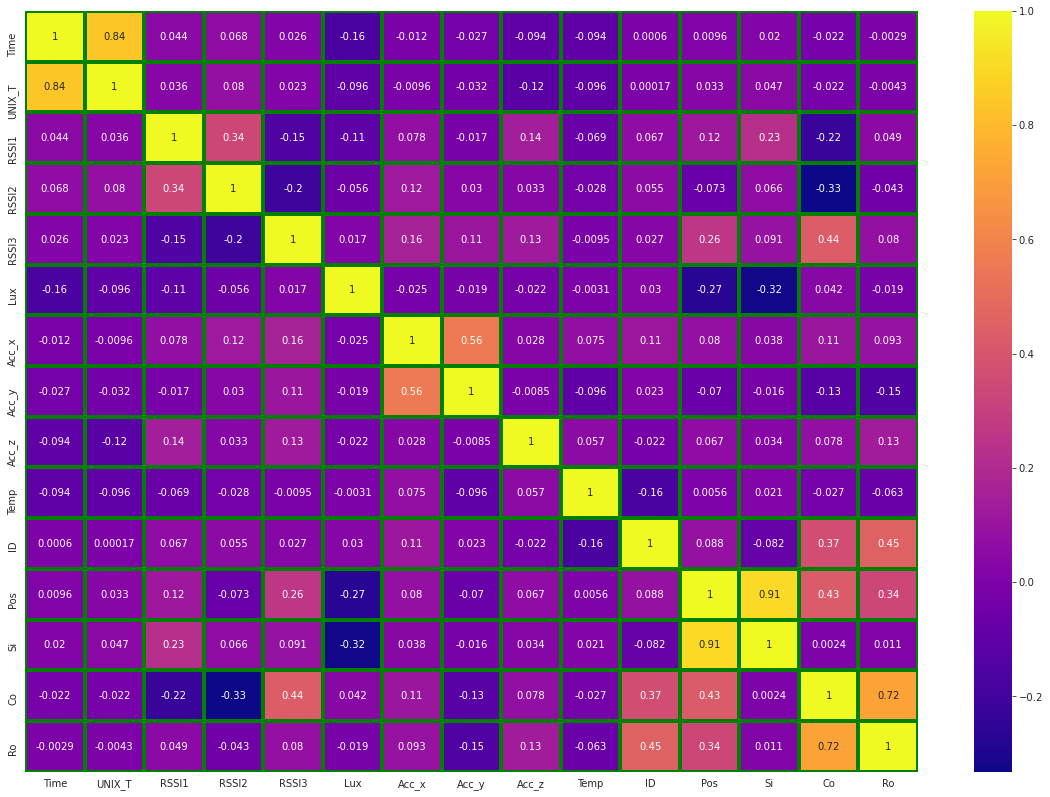

In [38]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'plasma')

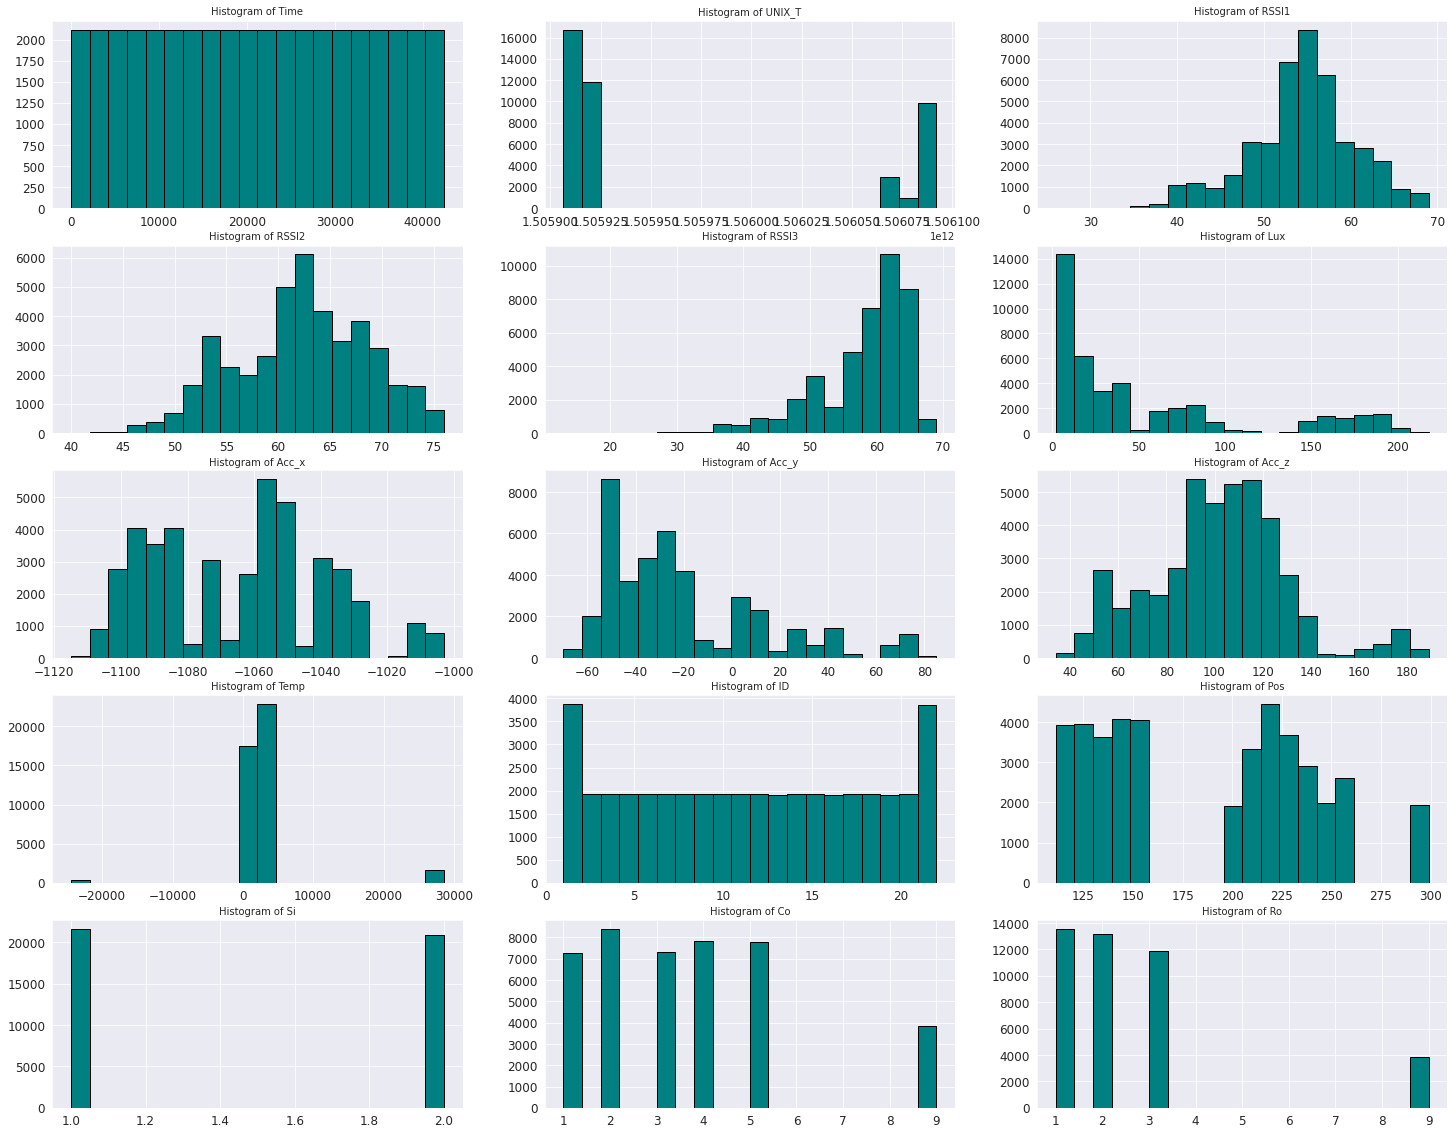

In [39]:

#Plotting All features distribution
i=1
plt.figure(figsize=(25,20))
for c in df.describe().columns[:]:
    plt.subplot(5,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='teal',edgecolor='k')
    i+=1
plt.show()

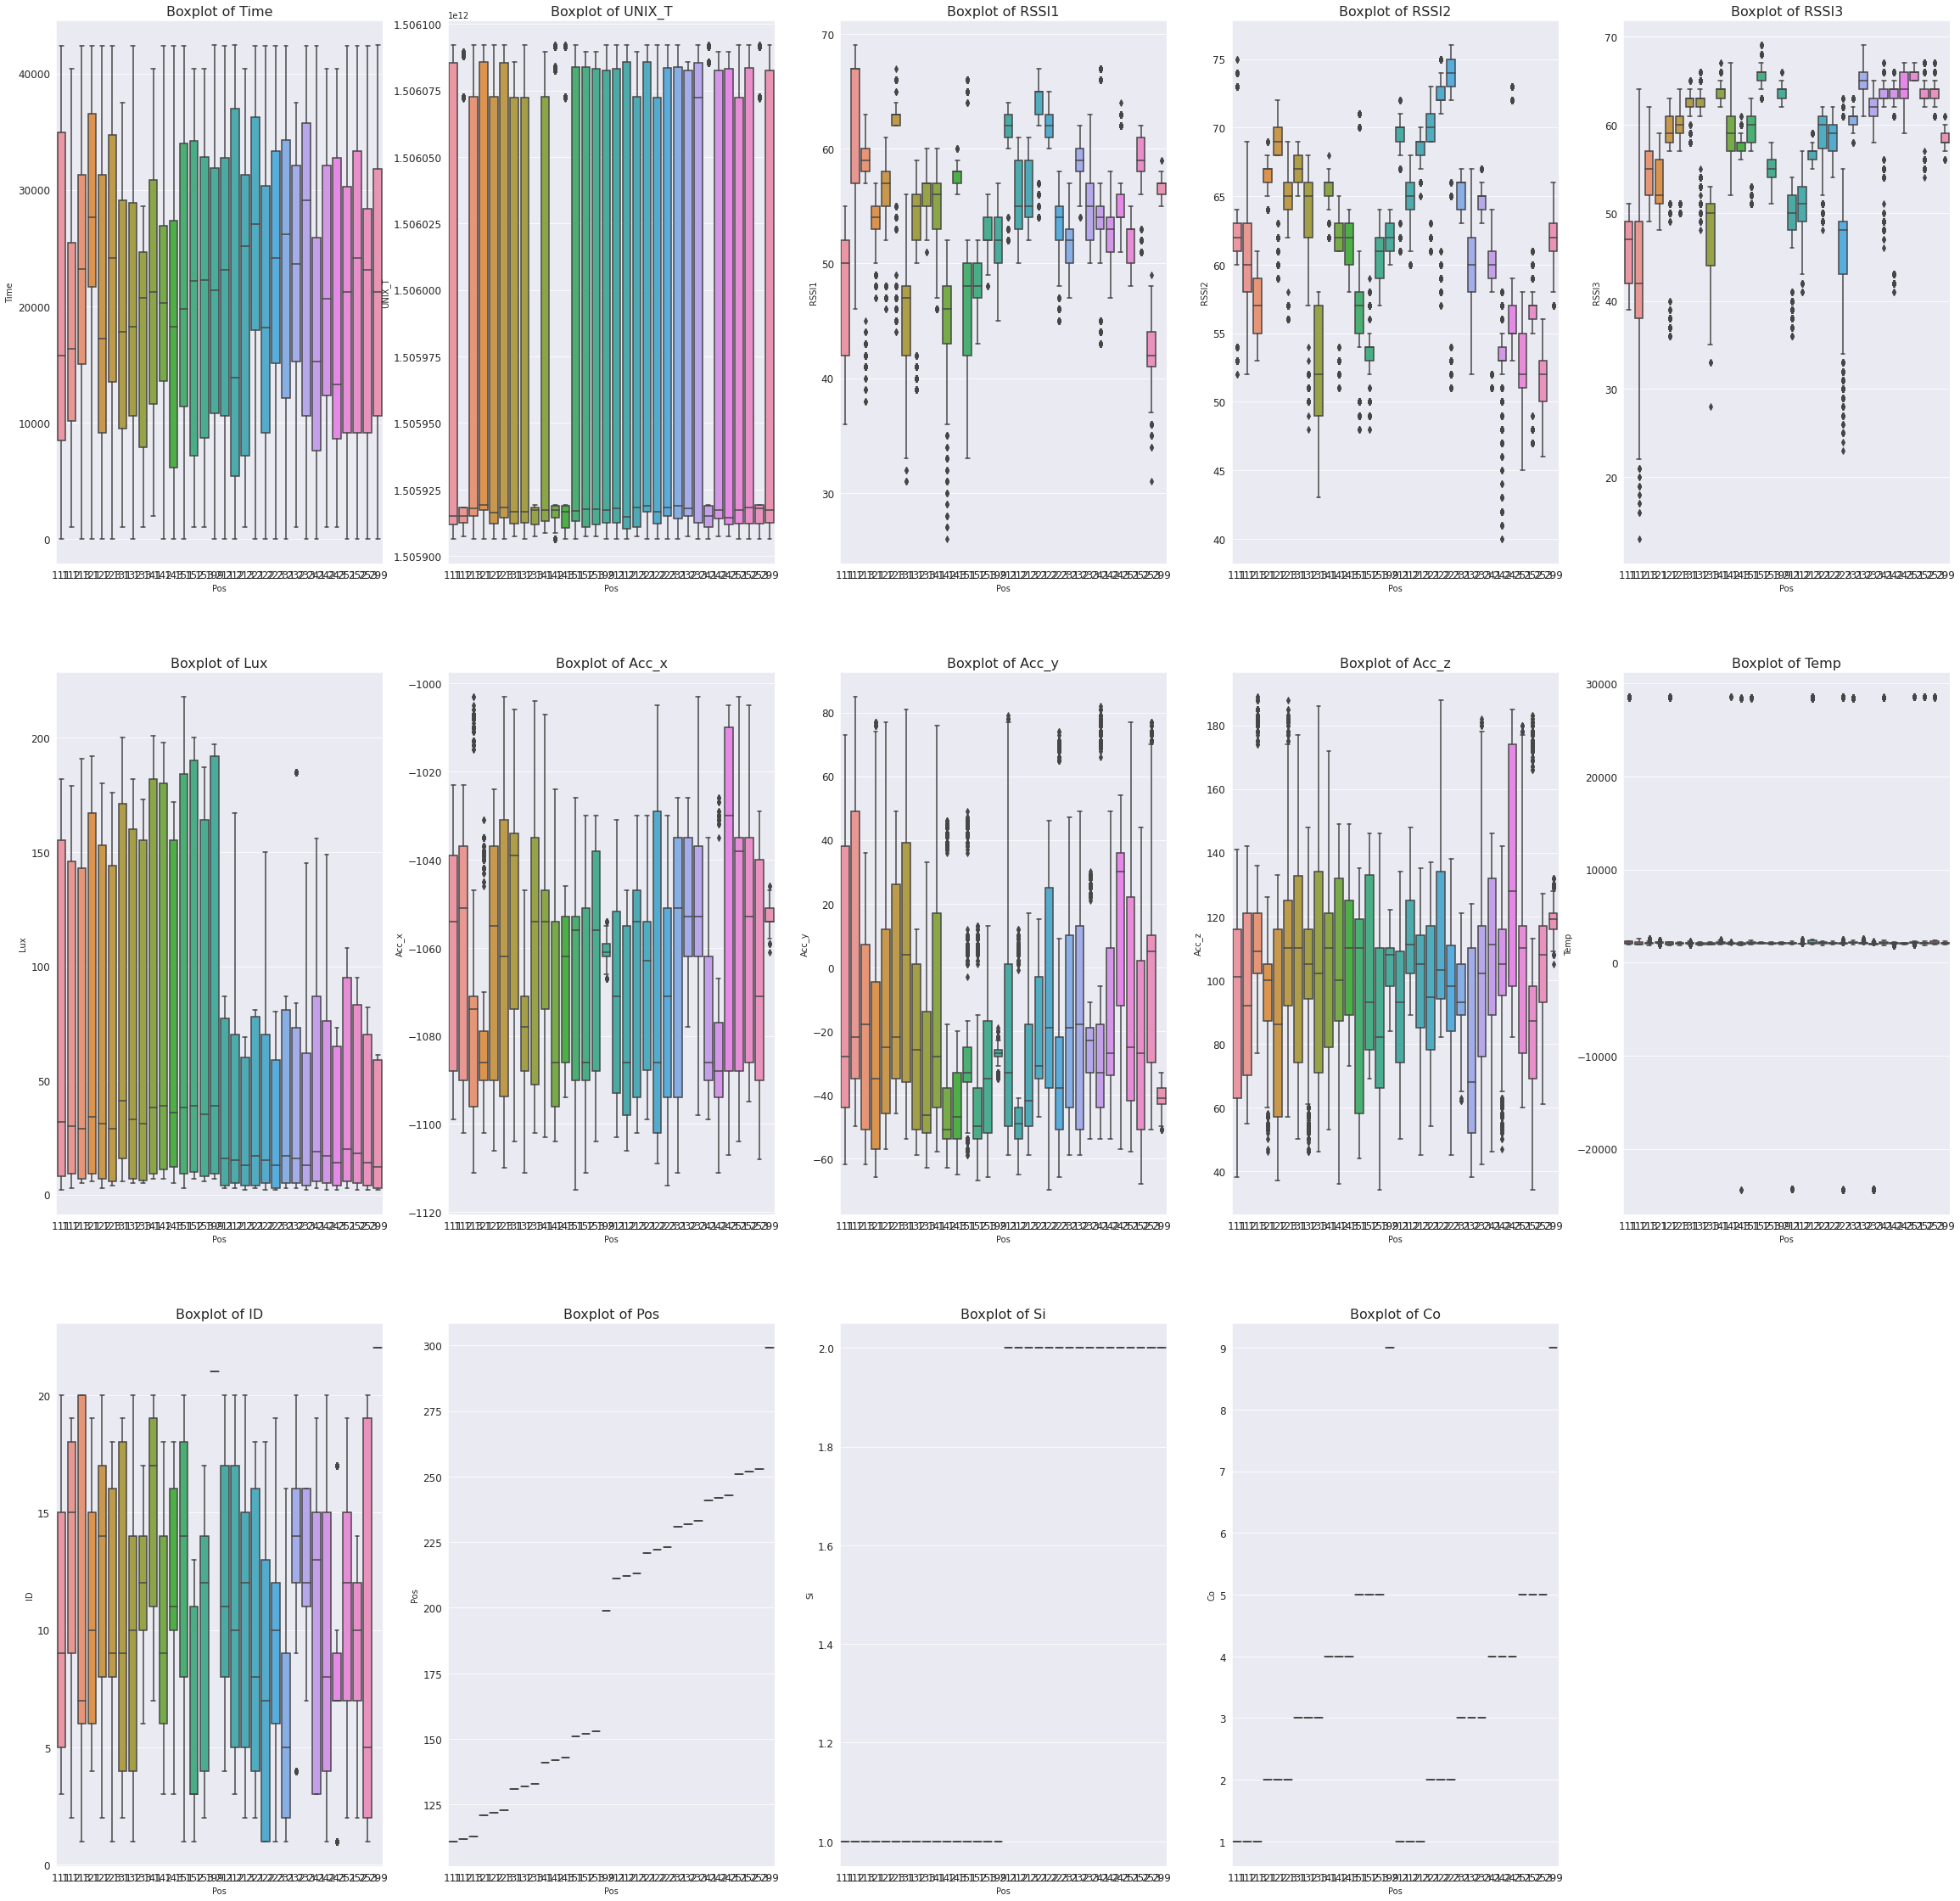

In [40]:
#Box Plotting All features distribution corresponding Target column
i=1
plt.figure(figsize=(40,40))
for c in df.columns[:14]:
    plt.subplot(3,5,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Pos'])
    i+=1
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

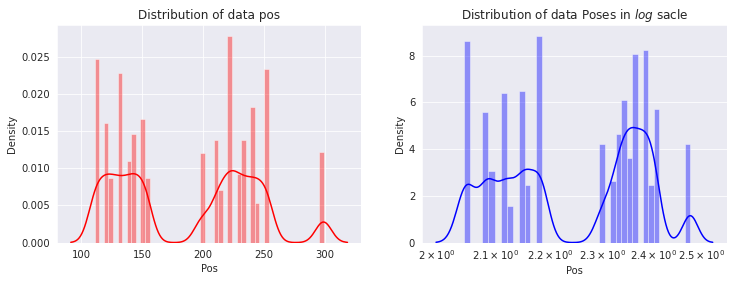

In [41]:
fig = plt.figure(figsize=(12,4))

ax=fig.add_subplot(121)
sns.distplot(df['Pos'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of data pos')

ax=fig.add_subplot(122)
sns.distplot(np.log10(df['Pos']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of data Poses in $log$ sacle')
ax.set_xscale('log')
""

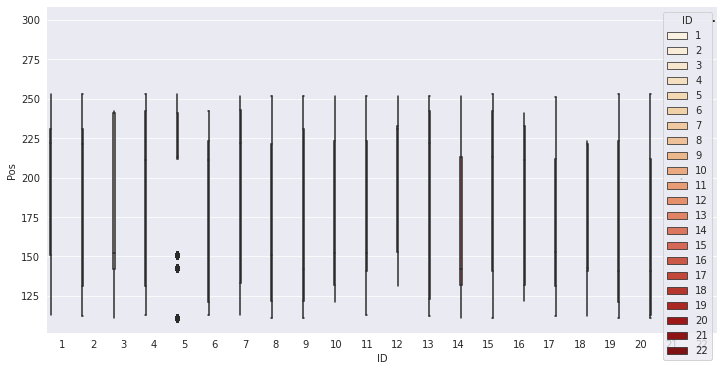

In [42]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x='ID', y='Pos', data = df, palette='OrRd', hue='ID')
sns.despine(left=True)

# **Feature Diagram**

In [43]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **Extra Trees Clasifier**

In [46]:
a=df.copy()

In [47]:
a

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [48]:
y= a['Pos']

X = a.drop(['Pos'],axis = 1)

In [49]:
X

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,1,9,9


In [50]:
y

0        123
1        122
2        132
3        113
4        213
        ... 
42410    141
42411    222
42412    242
42413    199
42414    299
Name: Pos, Length: 42415, dtype: int64

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
forest_clf = ExtraTreesClassifier(n_estimators=100, random_state=121)
forest_clf.fit(X,y)

ExtraTreesClassifier(random_state=121)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

# Extra Trees Feature Diagram=XGBoost

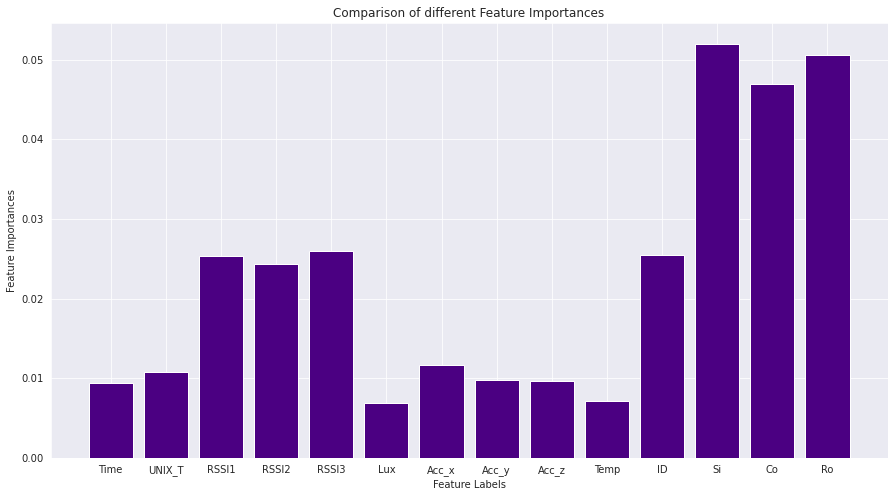

In [54]:
imp_features = forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_], axis = 0)
 
plt.figure(figsize = (15,8))
plt.bar(X.columns, std, color = 'indigo') 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

i will need to do data cleaning here if the result is overfitting
* UPDATE: OVERFITTING
* UPDATE: After setting 0.01 as min and 0.04 as max, it works

In [58]:
#Data Cleaning
drop_cols = ['Time','Lux','Temp','Si','Co','Ro']
a = a.drop(drop_cols, axis=1)

In [59]:
a

,UNIX_T,RSSI1,RSSI2,RSSI3,Acc_x,Acc_y,Acc_z,ID,Pos
0,1505919079914,63,67,63,-1102,-23,105,1,123
1,1505919079969,57,70,61,-1032,13,98,2,122
2,1505919080017,52,62,62,-1094,-50,142,3,132
3,1505919080066,61,58,58,-1072,5,121,4,113
4,1505919080120,57,67,59,-1050,-51,114,5,213
...,...,...,...,...,...,...,...,...,...
42410,1506083368788,58,65,63,-1096,-51,121,17,141
42411,1506083368833,62,72,58,-1056,-35,119,18,222
42412,1506083368940,53,57,63,-1071,5,113,20,242
42413,1506083368981,48,61,64,-1063,-25,93,21,199


In [60]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   UNIX_T  42415 non-null  int64
 1   RSSI1   42415 non-null  int64
 2   RSSI2   42415 non-null  int64
 3   RSSI3   42415 non-null  int64
 4   Acc_x   42415 non-null  int64
 5   Acc_y   42415 non-null  int64
 6   Acc_z   42415 non-null  int64
 7   ID      42415 non-null  int64
 8   Pos     42415 non-null  int64
dtypes: int64(9)
memory usage: 2.9 MB


In [61]:
#Feature Extraction, Importance & Splitting

y= a['Pos']

X = a.drop(['Pos'],axis = 1)

In [62]:
y

0        123
1        122
2        132
3        113
4        213
        ... 
42410    141
42411    222
42412    242
42413    199
42414    299
Name: Pos, Length: 42415, dtype: int64

In [63]:
X

,UNIX_T,RSSI1,RSSI2,RSSI3,Acc_x,Acc_y,Acc_z,ID
0,1505919079914,63,67,63,-1102,-23,105,1
1,1505919079969,57,70,61,-1032,13,98,2
2,1505919080017,52,62,62,-1094,-50,142,3
3,1505919080066,61,58,58,-1072,5,121,4
4,1505919080120,57,67,59,-1050,-51,114,5
...,...,...,...,...,...,...,...,...
42410,1506083368788,58,65,63,-1096,-51,121,17
42411,1506083368833,62,72,58,-1056,-35,119,18
42412,1506083368940,53,57,63,-1071,5,113,20
42413,1506083368981,48,61,64,-1063,-25,93,21


In [64]:

# splitting the dataset into train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2021)

In [65]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (33932, 8)
Shape of X_test:  (8483, 8)


In [66]:
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train:  (33932,)
Shape of y_test (8483,)


# Data Standardization/ Feature Scaling

In [67]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [68]:

# Feature Scaling
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# XGboost

In [69]:

xgboost = XGBClassifier(max_depth=5, learning_rate=0.005, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100



/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:10:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 98.37


# Cross Validation

In [71]:
xgb_cv = XGBClassifier(max_depth=10, learning_rate=1, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=1, reg_alpha=1)

scores = cross_val_score(xgb_cv, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:12:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:12:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:12:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scores: [0.99410638 0.9952851  0.99440024 0.99528441 0.9957265 ]
Mean: 0.9949605248604858
Standard Deviation: 0.0006067044509529431


In [73]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_predict

In [74]:
predictions = cross_val_predict(xgb_cv, df.drop('Pos', axis=1), df['Pos'], cv=5)
confusion_matrix(df['Pos'], predictions)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[1343,    0,    0, ...,    0,    0,    0],
       [   0, 1110,    0, ...,    0,    0,    0],
       [   0,    0, 1478, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1612,   21,    0],
       [   0,    0,    0, ...,    0,  865,    0],
       [   0,    0,    0, ...,    0,    0, 1933]])

In [76]:
print("Precision:", precision_score(df['Pos'], predictions, average='micro'))

print("Recall:",recall_score(df['Pos'], predictions, average='micro'))

Precision: 0.9881881409878581
Recall: 0.9881881409878581


In [77]:

print("F1-Score:", f1_score(df['Pos'], predictions, average='micro'))


F1-Score: 0.9881881409878581


# Random Forest Clasifier
## **Feature Diagram**

In [132]:
b

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [133]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Time    42415 non-null  int64
 1   UNIX_T  42415 non-null  int64
 2   RSSI1   42415 non-null  int64
 3   RSSI2   42415 non-null  int64
 4   RSSI3   42415 non-null  int64
 5   Lux     42415 non-null  int64
 6   Acc_x   42415 non-null  int64
 7   Acc_y   42415 non-null  int64
 8   Acc_z   42415 non-null  int64
 9   Temp    42415 non-null  int64
 10  ID      42415 non-null  int64
 11  Pos     42415 non-null  int64
 12  Si      42415 non-null  int64
 13  Co      42415 non-null  int64
 14  Ro      42415 non-null  int64
dtypes: int64(15)
memory usage: 4.9 MB


In [134]:
y= b['Pos']

X = b.drop(['Pos'],axis = 1)

In [135]:
X

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,1,9,9


In [136]:
y

0        123
1        122
2        132
3        113
4        213
        ... 
42410    141
42411    222
42412    242
42413    199
42414    299
Name: Pos, Length: 42415, dtype: int64

In [137]:
rfc =RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)

RandomForestClassifier()

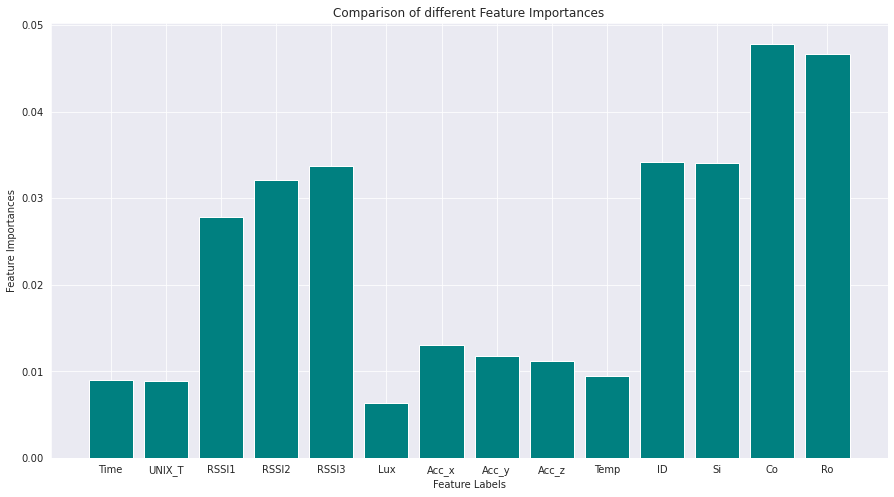

In [138]:

imp_features = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis = 0)
 
plt.figure(figsize = (15,8))
plt.bar(X.columns, std, color = 'teal') 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

# I will need to do data cleaning if the result is overfitting

* UPDATE: OVERFITTING
* UPDATE: After setting 0.01 as min and 0.04 as max, it works

In [149]:
#Data Cleaning
drop_cols = ['Time','UNIX_T','Lux','Temp','Co','Ro']
b= b.drop(drop_cols, axis=1)

In [150]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RSSI1   42415 non-null  int64
 1   RSSI2   42415 non-null  int64
 2   RSSI3   42415 non-null  int64
 3   Acc_x   42415 non-null  int64
 4   Acc_y   42415 non-null  int64
 5   Acc_z   42415 non-null  int64
 6   ID      42415 non-null  int64
 7   Pos     42415 non-null  int64
 8   Si      42415 non-null  int64
dtypes: int64(9)
memory usage: 2.9 MB


In [151]:
#Feature Extraction, Importance & Splitting

y= b['Pos']

X = b.drop(['Pos'],axis = 1)

In [152]:
X

,RSSI1,RSSI2,RSSI3,Acc_x,Acc_y,Acc_z,ID,Si
0,63,67,63,-1102,-23,105,1,1
1,57,70,61,-1032,13,98,2,1
2,52,62,62,-1094,-50,142,3,1
3,61,58,58,-1072,5,121,4,1
4,57,67,59,-1050,-51,114,5,2
...,...,...,...,...,...,...,...,...
42410,58,65,63,-1096,-51,121,17,1
42411,62,72,58,-1056,-35,119,18,2
42412,53,57,63,-1071,5,113,20,2
42413,48,61,64,-1063,-25,93,21,1


In [153]:
y

0        123
1        122
2        132
3        113
4        213
        ... 
42410    141
42411    222
42412    242
42413    199
42414    299
Name: Pos, Length: 42415, dtype: int64

In [154]:
# splitting the dataset into train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2021)

In [155]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (33932, 8)
Shape of X_test:  (8483, 8)


In [156]:
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train:  (33932,)
Shape of y_test (8483,)


In [157]:

from sklearn.preprocessing import RobustScaler, StandardScaler# Feature Scaling


In [158]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [181]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 98.00
Time consumed for training: 0.255 seconds
Time consumed for prediction: 0.02446 seconds


In [182]:
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 98.00


# Cross Validation

In [192]:
rfc_cv = RandomForestClassifier(max_depth=10, n_estimators=100)

scores = cross_val_score(rfc_cv, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.96950052 0.9697952  0.97008547 0.96610669 0.97155909]
Mean: 0.9694093929940351
Standard Deviation: 0.0017968461489792217


In [194]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [195]:

from sklearn.model_selection import train_test_split, cross_val_predict
predictions = cross_val_predict(xgb_cv, df.drop('Pos', axis=1), df['Pos'], cv=5)
confusion_matrix(df['Pos'], predictions)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[1343,    0,    0, ...,    0,    0,    0],
       [   0, 1110,    0, ...,    0,    0,    0],
       [   0,    0, 1478, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1612,   21,    0],
       [   0,    0,    0, ...,    0,  865,    0],
       [   0,    0,    0, ...,    0,    0, 1933]])

In [ ]:

print("Precision:", precision_score(df['Pos'], predictions, average='micro'))

print("Recall:",recall_score(df['Pos'], predictions, average='micro'))

In [ ]:


print("F1-Score:", f1_score(df['Pos'], predictions, average='micro'))


# xTrain y trainv 69-75
# XGBoost 

# cross validation

# 24-28

# Data Preprocessing

In [ ]:
X=df.drop('Pos', axis=1)
y=df['Pos'] 

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

# K- Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

# Scitkit-Learn's Random Forest Classifier

In [ ]:
rfc =RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
imp_features = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis = 0)
 
plt.figure(figsize = (15,8))
plt.bar(X.columns, std, color = 'teal') 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

In [ ]:
drop_cols = ['Si','Co','Ro']
df1 = df.drop(drop_cols, axis=1)

In [ ]:
df

In [ ]:
df1

In [ ]:
X=df1.drop('Pos', axis=1)
y=df1['Pos'] 

In [ ]:
X

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [ ]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# This has to be changed

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

# XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

# Cross Validation


# XGBoost

e# 

xgb_cv = XGBClassifier(max_depth=10, learning_rate=1, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=1, reg_alpha=1)

scores = cross_val_score(xgb_cv, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


# 

# Comparison

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 
              'XGBoost', 'Random Forest',],
    'Score': [acc_knn, acc_xgb, acc_rfc,],
    'Runtime Training': [knn_train_time, xgb_train_time, rfc_train_time],
    'Runtime Prediction': [knn_prediction_time, xgb_prediction_time, rfc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df